# Zadanie

Napisz (od podstaw) algorytm znajdowania minimum metodą gradientową.
Zaprezentuj jego działanie na przykładzie funkcji $f(x)=x^2$, startując z punktu $x=2$. Zilustruj całą sytuacje oznaczając na wykresie 5 pierwszych iteracji.

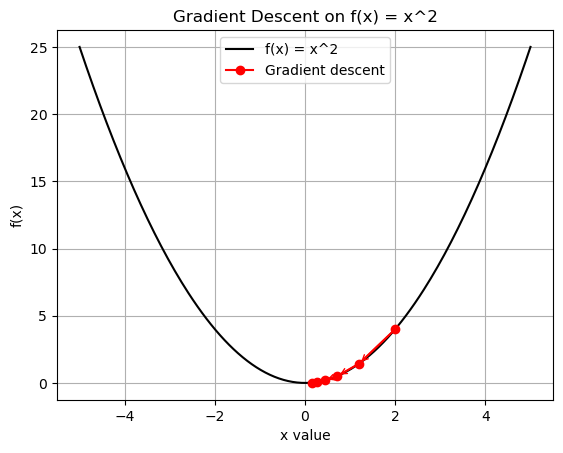

In [1]:
# First, let's import the necessary libraries and define the function for gradient descent
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = x^2 and its derivative
f = lambda x: x**2
df = lambda x: 2*x

# Generate x values and corresponding y values for the plot
x_values = np.linspace(-5, 5, 200)
y_values = f(x_values)

# Define the gradient descent step function
def step_gradient(x_current, learning_rate):
    x_gradient = df(x_current)
    x_next = x_current - (learning_rate * x_gradient)
    return x_next

# Define the function to perform gradient descent
def gradient_descent_runner(starting_x, learning_rate, num_iterations):
    x = starting_x
    # Record the progression of x values
    x_progression = [x]
    for _ in range(num_iterations):
        x = step_gradient(x, learning_rate)
        x_progression.append(x)
    return x_progression

# Set the hyperparameters
learning_rate = 0.2
initial_x = 2  # start at x = 2
num_iterations = 5

# Run gradient descent
x_progression = gradient_descent_runner(initial_x, learning_rate, num_iterations)

# Plot the function and the steps of gradient descent
plt.plot(x_values, y_values, 'k-', label='f(x) = x^2')
plt.plot(x_progression, f(np.array(x_progression)), 'r-', marker='o', label='Gradient descent')

# Annotate the gradient descent steps on the plot
for i in range(1, len(x_progression)):
    plt.annotate('',
                 xy=(x_progression[i], f(x_progression[i])),
                 xytext=(x_progression[i-1], f(x_progression[i-1])),
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')

# Add labels and title
plt.title('Gradient Descent on f(x) = x^2')
plt.xlabel('x value')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Zadanie
Wykonaj powyższe zadania dla 
  * learning_rate = 0.001
  * learning_rate = 0.1
  * learning_rate = 0.2
  * learning_rate = 0.5
  * learning_rate = 0.9
  * learning_rate = 0.99
  * learning_rate = 0.999

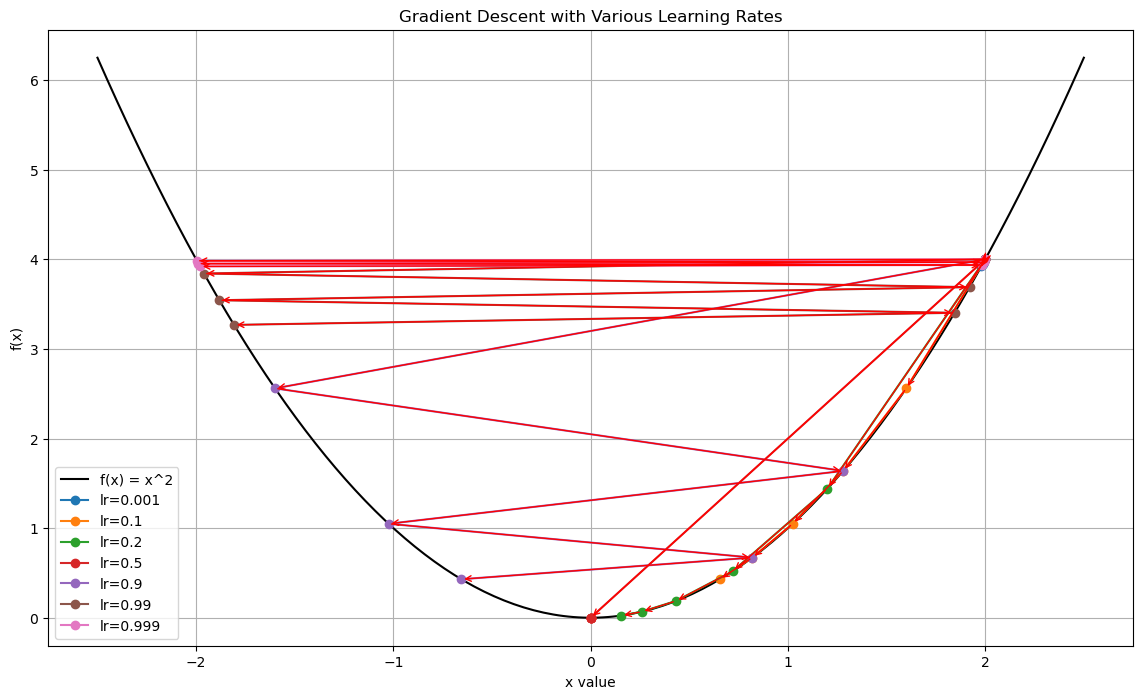

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = x^2 and its derivative
f = lambda x: x**2
df = lambda x: 2 * x


# Define the gradient descent step function
def step_gradient(x_current, learning_rate):
    x_gradient = df(x_current)
    x_next = x_current - (learning_rate * x_gradient)
    return x_next


# Define the function to perform gradient descent
def gradient_descent_runner(starting_x, learning_rate, num_iterations):
    x = starting_x
    # Record the progression of x values
    x_progression = [x]
    for _ in range(num_iterations):
        x = step_gradient(x, learning_rate)
        x_progression.append(x)
    return x_progression


# Generate x values and corresponding y values for the plot
x_values = np.linspace(-2.5, 2.5, 200)
y_values = f(x_values)

# Plot the function
plt.figure(figsize=(14, 8))
plt.plot(x_values, y_values, "k-", label="f(x) = x^2")

# Set hyperparameters
initial_x = 2  # start at x = 2
num_iterations = 5
learning_rates = [0.001, 0.1, 0.2, 0.5, 0.9, 0.99, 0.999]

# Run gradient descent for each learning rate and plot the steps
for lr in learning_rates:
    x_progression = gradient_descent_runner(initial_x, lr, num_iterations)
    plt.plot(x_progression, f(np.array(x_progression)), marker="o", label=f"lr={lr}")

# Annotate the gradient descent steps on the plot
for lr in learning_rates:
    x_progression = gradient_descent_runner(initial_x, lr, num_iterations)
    for i in range(1, len(x_progression)):
        plt.annotate(
            "",
            xy=(x_progression[i], f(x_progression[i])),
            xytext=(x_progression[i - 1], f(x_progression[i - 1])),
            arrowprops={"arrowstyle": "->", "color": "r", "lw": 1},
            va="center",
            ha="center",
        )

# Add labels, title and legend
plt.title("Gradient Descent with Various Learning Rates")
plt.xlabel("x value")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Zadanie 2

Napisz (od podstaw) algorytm znajdowania minimum metodą gradientową.
Zaprezentuj jego działanie na przykładzie funkcji 

$$
f(x,y)=4*x^2-2x+y^2,
$$ 

startując z punktu $(x,y)=(2,2)$. Zilustruj całą sytuacje oznaczając na wykresie kilka pierwszych iteracji.
Wykonaj obrazek 3D.

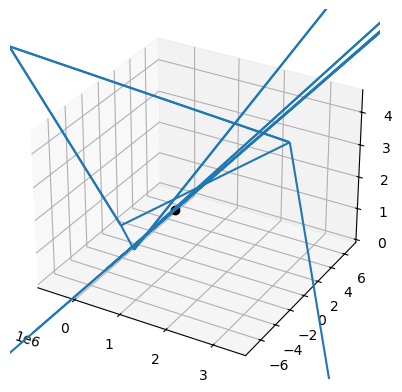

In [13]:
###########

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# %matplotlib notebook

plt.close("all")

fun = lambda x, y: 4 * x**2 + y**2

fig = plt.figure()
ax = fig.add_subplot(projection="3d") ##?//

# Make data.
X = np.arange(-7, 7, 0.25)
Y = np.arange(-7, 7, 0.25)
X, Y = np.meshgrid(X, Y)
Z = fun(X, Y)

# Plot the surface.
surf = ax.plot_surface(
    X, Y, Z, cmap=cm.coolwarm, linewidth=0.01, antialiased=True, alpha=0.3
)


#####################################


def step_gradient_2d(x_current, y_current, learningRate):
    x_gradient = 8 * x_current - 2
    y_gradient = 2 * y_current

    new_x = x_current - (learningRate * x_gradient)
    new_y = y_current - (learningRate * y_gradient)

    ax.quiver(
        x_current,
        y_current,
        (fun(x_current, y_current)),
        -(learningRate * x_gradient),
        -(learningRate * y_gradient),
        (-(fun(x_current, y_current) - fun(new_x, new_y))),
    )

    return [new_x, new_y]


def gradient_descent_runner_2d(starting_x, starting_y, learning_rate, num_iterations):
    x = starting_x
    y = starting_y
    for i in range(num_iterations):
        x, y = step_gradient_2d(x, y, learning_rate)
        # print(x, y)
    return [x, y]


learning_rate = 0.9
initial_x = 0  # initial y-intercept guess
initial_y = 5  # initial slope guess
num_iterations = 10
[x, y] = gradient_descent_runner_2d(initial_x, initial_y, learning_rate, num_iterations)


#####################################

plt.plot([initial_x], [initial_y], [fun(initial_x, initial_y)], "ok")
plt.show()

# Zadanie
Wykonaj analogiczne zadanie ale z:
  * initial_x = 5 
  * initial_y = 0 
  * num_iterations = 10

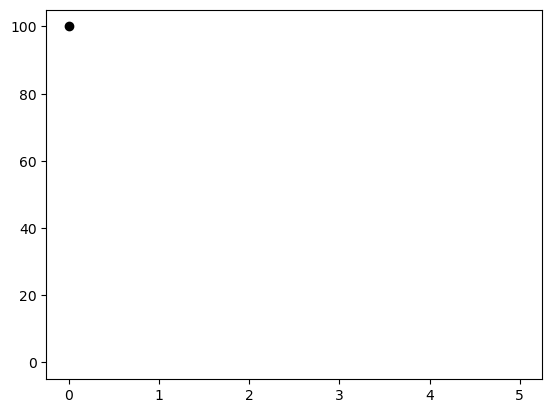

In [15]:
learning_rate = 0.9
initial_x = 5  # initial y-intercept guess
initial_y = 0  # initial slope guess
num_iterations = 10
[x, y] = gradient_descent_runner_2d(initial_x, initial_y, learning_rate, num_iterations)

plt.plot([initial_x], [initial_y], [fun(initial_x, initial_y)], "ok")
plt.show()

# Zadanie
Wykonaj analogiczne zadanie ale z obrazkiem 2d

$$
f(x,y)=x^2-2x+y^2,
$$ 

oraz

$$
f(x,y)=4*x^2-2x+y^2,
$$ 


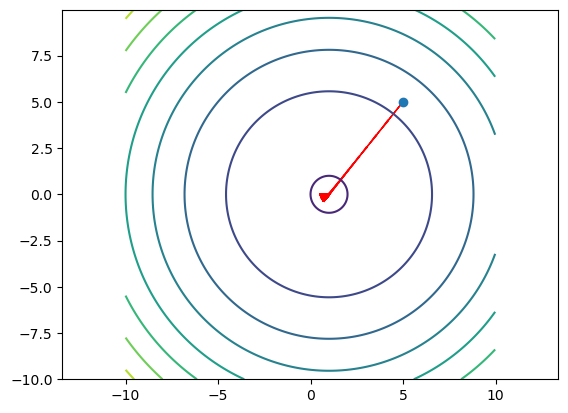

In [16]:
import numpy as np
import matplotlib.pyplot as plt

chi2 = lambda x,y: x**2-2*x+y**2

x = np.arange(-10,10,0.02)
y = np.arange(-10,10,0.02)

X,Y= np.meshgrid(x,y)

Z = chi2(X,Y)

plt.figure()
CS = plt.contour(X,Y,Z)

plt.plot([5],[5],"o")

#####################################

def step_gradient_2d(x_current, y_current, learningRate):
    x_gradient = 2*x_current-2
    y_gradient = 2*y_current
    
    new_x = x_current - (learningRate * x_gradient)
    new_y = y_current - (learningRate * y_gradient)
    
    plt.arrow(x_current, y_current, - (learningRate * x_gradient), - (learningRate * y_gradient), head_width=0.05, head_length=0.5,ec="red")
    
    return [new_x, new_y]
def gradient_descent_runner_2d(starting_x, starting_y, learning_rate, num_iterations):
    x = starting_x
    y = starting_y
    for i in range(num_iterations):
        x, y = step_gradient_2d(x, y, learning_rate)
        #print(x, y)
    return [x, y]


learning_rate = 0.1
initial_x = 5 # initial y-intercept guess
initial_y = 5 # initial slope guess
num_iterations = 1000
[x, y] = gradient_descent_runner_2d(initial_x, initial_y, learning_rate, num_iterations)


#####################################
plt.axis('equal')
plt.show()



# Zadanie 3

Napisz (od podstaw) algorytm znajdowania minimum metodą gradientową.
Zaprezentuj jego działanie na przykładzie funkcji $f(x)=x^2-y^2$, startując z punktu $x=5$ oraz $x=1$. Zilustruj całą sytuacje oznaczając na wykresie 5 pierwszych iteracji.

Wykonaj rysunek:
  
  * 2D conture plot
  * 3D 
  
Co się stanie gdy zaczniemy z punktu $x=5$ oraz $x=0$? 

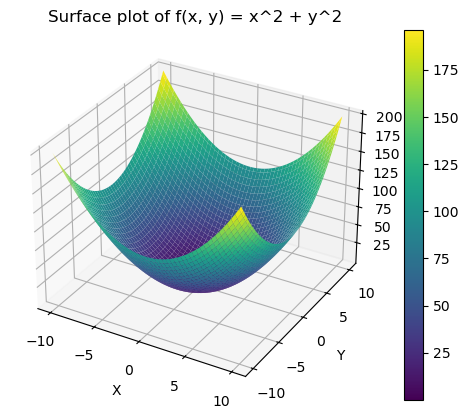

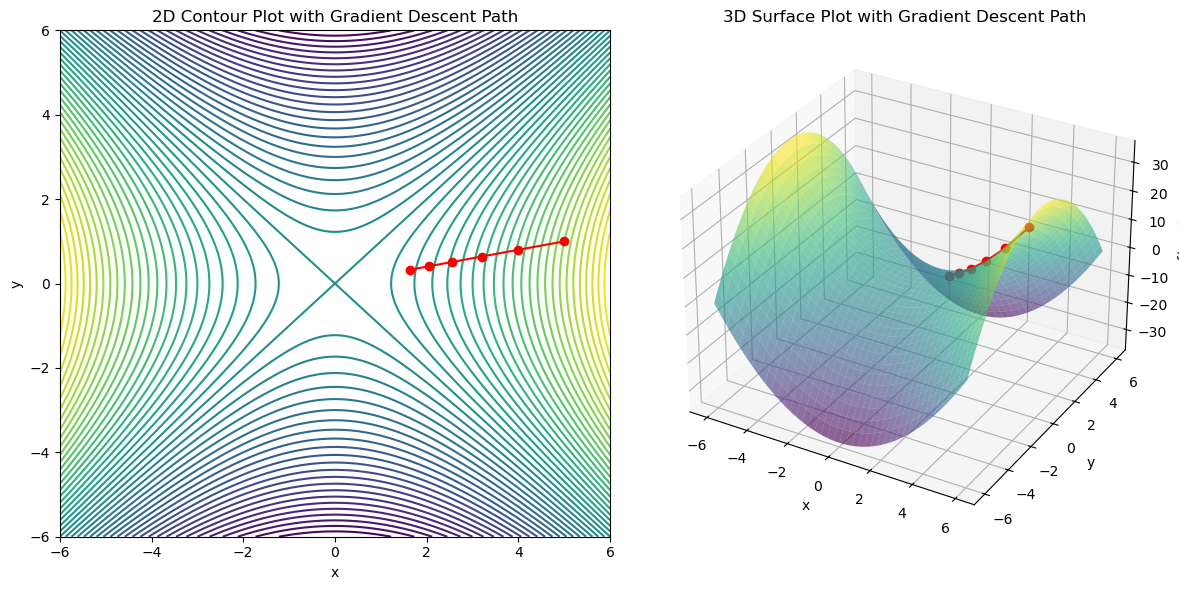

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")


surf = ax.plot_surface(X, Y, Z, cmap="viridis")


ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Surface plot of f(x, y) = x^2 + y^2")

fig.colorbar(surf)

plt.show()


def grad_f(point):
    x, y = point
    return np.array([2*x, 2*y])


def gradient_descent(starting_point, iterations, learning_rate):
    points = [starting_point]
    for _ in range(iterations):
        current_point = points[-1]
        gradient = grad_f(current_point)
        new_point = current_point - learning_rate * gradient
        points.append(new_point)
    return np.array(points)


starting_point = np.array([5, 1])
iterations = 5
learning_rate = 0.1

points = gradient_descent(starting_point, iterations, learning_rate)

x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)
Z = X**2 - Y**2

plt.figure(figsize=(12, 6))

# Left plot - 2D contour
plt.subplot(1, 2, 1)
plt.contour(X, Y, Z, levels=50, cmap="viridis")
plt.plot(points[:, 0], points[:, 1], "ro-")
plt.title("2D Contour Plot with Gradient Descent Path")
plt.xlabel("x")
plt.ylabel("y")

# Right plot - 3D surface plot
ax = plt.subplot(1, 2, 2, projection="3d")
ax.plot_surface(X, Y, Z, rstride=10, cstride=10, alpha=0.6, cmap="viridis")
ax.plot(points[:, 0], points[:, 1], points[:, 0] ** 2 - points[:, 1] ** 2, "ro-")
ax.set_title("3D Surface Plot with Gradient Descent Path")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

# Show the plots
plt.tight_layout()
plt.show()

# Metoda Najmniejszych Kwadratów
W roku 1801 astronomowie zgubili z oczu asteroidę i chodziło o to, by odszukać ją z powrotem na niebie. 

Gauss stworzył MNK (Metoda Najmniejszych Kwadratów) właśnie w celu jej odszukania, co mu się udało – znalazła się dokładnie tam, gdzie Gauss przewidział, że będzie.


Współczynnik a (nachylenie): 1.2769696969696975
Współczynnik b (przecięcie z osią Y): 0.38666666666666316


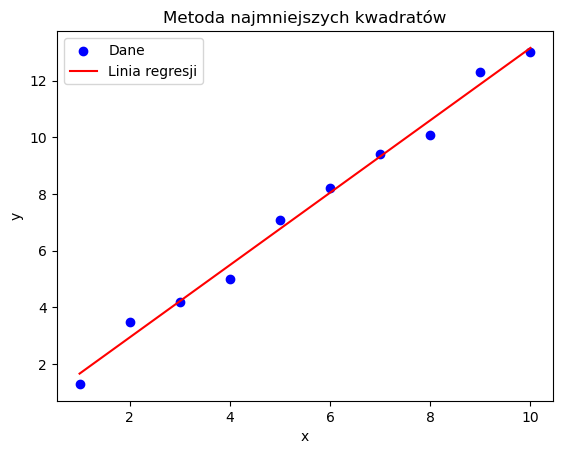

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Przykładowe dane
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1.3, 3.5, 4.2, 5.0, 7.1, 8.2, 9.4, 10.1, 12.3, 13.0])

# Liczba punktów danych
N = len(x)

# Obliczenia potrzebne do znalezienia a i b metodą najmniejszych kwadratów
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x_squared = np.sum(x**2)
sum_xy = np.sum(x * y)

# Obliczenie współczynników a i b
a = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x**2)
b = (sum_y - a * sum_x) / N

# Wypisz wyniki
print(f"Współczynnik a (nachylenie): {a}")
print(f"Współczynnik b (przecięcie z osią Y): {b}")

# Rysowanie wykresu danych oraz linii regresji
plt.scatter(x, y, color="blue", label="Dane")
plt.plot(x, a * x + b, color="red", label="Linia regresji")
plt.title("Metoda najmniejszych kwadratów")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()